## Preparation


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
path = "/content/drive/MyDrive/ColabNotebooks/DD2360/hw4_4"
os.chdir(path)
!ls

ex_4.cu


## Compilation

In [14]:
!nvcc ex_4.cu -lcusparse -lcublas -o ex_4

In [44]:
!nvcc ex_4_4.cu -lcusparse -lcublas -o ex_4_4

## Q1

In [24]:
!./ex_4 256 1

The X dimension of the grid is 256 
The number of time steps to perform is 1 
Timing - Allocating device memory. 		Elasped 173529 microseconds 
Timing - Prefetching GPU memory to the host. 		Elasped 88 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 5 microseconds 
Timing - Initializing memory on the host. 		Elasped 30 microseconds 
Timing - Prefetching GPU memory to the device. 		Elasped 303 microseconds 
Timing - Sparse matrix multiplication. 		Elasped 40 microseconds 
The relative error of the approximation is 10.301116


In [25]:
!./ex_4 512 1

The X dimension of the grid is 512 
The number of time steps to perform is 1 
Timing - Allocating device memory. 		Elasped 180080 microseconds 
Timing - Prefetching GPU memory to the host. 		Elasped 94 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 8 microseconds 
Timing - Initializing memory on the host. 		Elasped 21 microseconds 
Timing - Prefetching GPU memory to the device. 		Elasped 293 microseconds 
Timing - Sparse matrix multiplication. 		Elasped 30 microseconds 
The relative error of the approximation is 14.616030


In [26]:
!./ex_4 2048 1

The X dimension of the grid is 2048 
The number of time steps to perform is 1 
Timing - Allocating device memory. 		Elasped 176226 microseconds 
Timing - Prefetching GPU memory to the host. 		Elasped 109 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 32 microseconds 
Timing - Initializing memory on the host. 		Elasped 24 microseconds 
Timing - Prefetching GPU memory to the device. 		Elasped 306 microseconds 
Timing - Sparse matrix multiplication. 		Elasped 30 microseconds 
The relative error of the approximation is 29.303943


In [27]:
!./ex_4 4096 1

The X dimension of the grid is 4096 
The number of time steps to perform is 1 
Timing - Allocating device memory. 		Elasped 183835 microseconds 
Timing - Prefetching GPU memory to the host. 		Elasped 114 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 58 microseconds 
Timing - Initializing memory on the host. 		Elasped 47 microseconds 
Timing - Prefetching GPU memory to the device. 		Elasped 339 microseconds 
Timing - Sparse matrix multiplication. 		Elasped 35 microseconds 
The relative error of the approximation is 41.458954


In [28]:
!./ex_4 10240 1

The X dimension of the grid is 10240 
The number of time steps to perform is 1 
Timing - Allocating device memory. 		Elasped 179023 microseconds 
Timing - Prefetching GPU memory to the host. 		Elasped 156 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 120 microseconds 
Timing - Initializing memory on the host. 		Elasped 66 microseconds 
Timing - Prefetching GPU memory to the device. 		Elasped 307 microseconds 
Timing - Sparse matrix multiplication. 		Elasped 35 microseconds 
The relative error of the approximation is 65.568408


## Q2

In [32]:
!bash ./run.sh | grep error > ex_4_2

In [ ]:
!grep -o '[0-9]*\.[0-9]\+' ex_4_2 | tee ex_4_2new

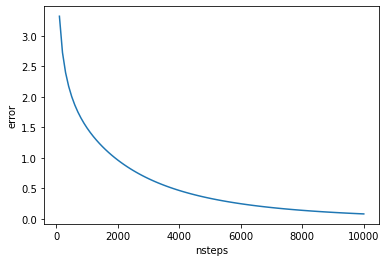

In [41]:
import matplotlib.pyplot as plt
with open("ex_4_2new.txt", "r") as f: 
  lines = f.readlines()
  data = [float(line.strip()) for line in lines]


x = []
for i in range(100, 10100, 100):
  x.append(i)

plt.plot(x, data)
plt.xlabel('nsteps')
plt.ylabel('error')

plt.show()

## Q3

In [56]:
!nvprof ./ex_4 128 50

The X dimension of the grid is 128 
The number of time steps to perform is 50 
==30283== NVPROF is profiling process 30283, command: ./ex_4 128 50
Timing - Allocating device memory. 		Elasped 320407 microseconds 
Timing - Prefetching GPU memory to the host. 		Elasped 59 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 3 microseconds 
Timing - Initializing memory on the host. 		Elasped 1 microseconds 
Timing - Prefetching GPU memory to the device. 		Elasped 200 microseconds 
Timing - Sparse matrix multiplication. 		Elasped 52 microseconds 
Timing - Sparse matrix multiplication. 		Elasped 15 microseconds 
Timing - Sparse matrix multiplication. 		Elasped 13 microseconds 
Timing - Sparse matrix multiplication. 		Elasped 14 microseconds 
Timing - Sparse matrix multiplication. 		Elasped 13 microseconds 
Timing - Sparse matrix multiplication. 		Elasped 13 microseconds 
Timing - Sparse matrix multiplication. 		Elasped 12 microseconds 
Timing - Sparse matrix multipli

In [57]:
!nvprof ./ex_4_4 128 50

The X dimension of the grid is 128 
The number of time steps to perform is 50 
==30362== NVPROF is profiling process 30362, command: ./ex_4_4 128 50
Timing - Allocating device memory. 		Elasped 316672 microseconds 
Timing - Prefetching GPU memory to the host. 		Elasped 0 microseconds 
Timing - Initializing the sparse matrix on the host. 		Elasped 71 microseconds 
Timing - Initializing memory on the host. 		Elasped 0 microseconds 
Timing - Prefetching GPU memory to the device. 		Elasped 0 microseconds 
The relative error of the approximation is 3.958913
==30362== Profiling application: ./ex_4_4 128 50
==30362== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   71.49%  4.9217ms       104  47.323us  43.871us  52.672us  void nrm2_kernel<double, double, double, int=0, int=0, int=128>(cublasNrm2Params<double, double>)
                   11.75%  809.24us        50  16.184us  16.063us  16.896us  _ZN8cusparse21load_balancing_k